In [3]:
import pickle
from pathlib import Path

import matplotlib.pyplot as plt
import torch
from neuralhydrology.evaluation import metrics
from neuralhydrology.nh_run import start_run, eval_run

In [34]:
# by default we assume that you have at least one CUDA-capable NVIDIA GPU
if torch.cuda.is_available():
    start_run(config_file=Path("2_basin.yml"))

# fall back to CPU-only mode
else:
    start_run(config_file=Path("2_basin.yml"), gpu=-1)

2024-06-18 20:09:36,174: Logging to c:\Users\Inigo\Projects\neuralhydrology\examples\01-Introduction\runs\american_river_test_run_1806_200936\output.log initialized.
2024-06-18 20:09:36,176: ### Folder structure created at c:\Users\Inigo\Projects\neuralhydrology\examples\01-Introduction\runs\american_river_test_run_1806_200936
2024-06-18 20:09:36,176: ### Run configurations for american_river_test_run
2024-06-18 20:09:36,179: experiment_name: american_river_test_run
2024-06-18 20:09:36,179: train_basin_file: 2_basin.txt
2024-06-18 20:09:36,180: validation_basin_file: 2_basin.txt
2024-06-18 20:09:36,181: test_basin_file: 2_basin.txt
2024-06-18 20:09:36,181: train_start_date: 1950-01-01 00:00:00
2024-06-18 20:09:36,182: train_end_date: 1986-12-31 00:00:00
2024-06-18 20:09:36,182: validation_start_date: 1987-01-01 00:00:00
2024-06-18 20:09:36,183: validation_end_date: 1994-12-31 00:00:00
2024-06-18 20:09:36,183: test_start_date: 1995-01-01 00:00:00
2024-06-18 20:09:36,185: test_end_date: 

In [8]:
run_dir = Path("runs/american_river_test_run_1806_105745")
eval_run(run_dir=run_dir, period="test")

# Evaluation: 100%|██████████| 1/1 [00:00<00:00,  1.10it/s]


In [9]:
with open(run_dir / "test" / "model_epoch050" / "test_results.p", "rb") as fp:
    results = pickle.load(fp)
    
results.keys()

dict_keys(['camels_11446500'])

In [10]:
results['camels_11446500']['1D']['xr']

<xarray.Dataset> Size: 64kB
Dimensions:         (date: 4018, time_step: 1)
Coordinates:
  * date            (date) datetime64[ns] 32kB 2007-01-01 ... 2017-12-31
  * time_step       (time_step) int64 8B 0
Data variables:
    streamflow_obs  (date, time_step) float32 16kB 1.03 1.03 1.03 ... 1.73 1.73
    streamflow_sim  (date, time_step) float32 16kB 0.9607 1.064 ... 0.9813 1.053

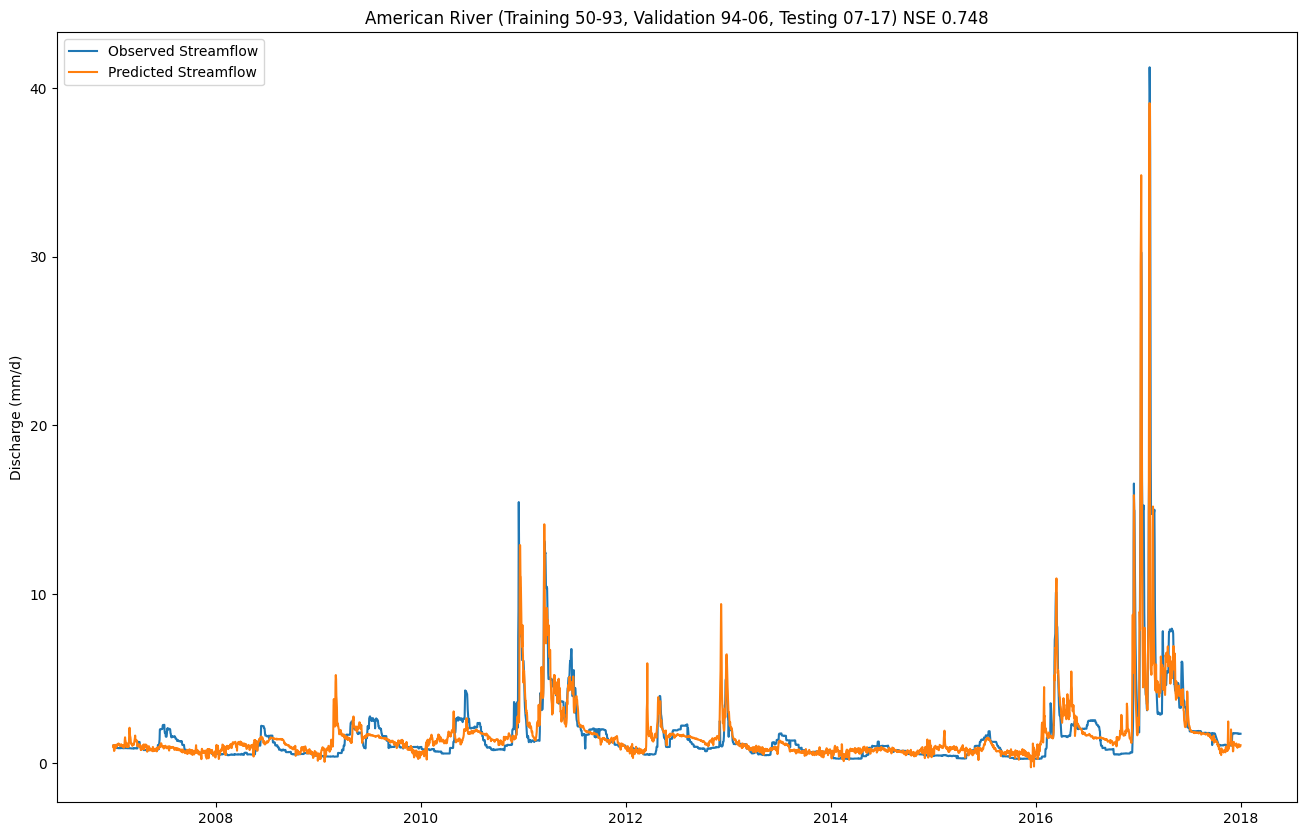

In [12]:
# extract observations and simulations
qobs = results['camels_11446500']['1D']['xr']['streamflow_obs']
qsim = results['camels_11446500']['1D']['xr']['streamflow_sim']

fig, ax = plt.subplots(figsize=(16,10))
ax.plot(qobs['date'], qobs, label = "Observed Streamflow")
ax.plot(qsim['date'], qsim, label = "Predicted Streamflow")
ax.set_ylabel("Discharge (mm/d)")
ax.set_title(f"American River (Training 50-93, Validation 94-06, Testing 07-17) NSE {results['camels_11446500']['1D']['NSE']:.3f}")
ax.legend()
plt.show()

In [39]:
qsim_df = qsim.to_dataframe()
qsim_df.to_csv("american_river_nh_sim_result.csv")

In [40]:
values = metrics.calculate_all_metrics(qobs.isel(time_step=-1), qsim.isel(time_step=-1))
for key, val in values.items():
    print(f"{key}: {val:.3f}")

NSE: 0.610
MSE: 3.133
RMSE: 1.770
KGE: 0.787
Alpha-NSE: 1.063
Beta-KGE: 1.098
Beta-NSE: 0.078
Pearson-r: 0.821
FHV: 11.549
FMS: 30.546
FLV: -20.714
Peak-Timing: 1.750
Peak-MAPE: 39.779


c:\Users\Inigo\Projects\neuralhydrology\.venv\Lib\site-packages\neuralhydrology\datautils\utils.py:327: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\Inigo\Projects\neuralhydrology\.venv\Lib\site-packages\neuralhydrology\datautils\utils.py:368: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)
